In [1]:
import pandas as pd

initiate_search = pd.read_csv('/Users/orin/Data Science/tidal_da_test/data/initiate_search.csv')
# an event that is triggered when a user enters an empty search
# query field to begin entering a query. This is the first event of what we define as a
# search session.

search_result = pd.read_csv('/Users/orin/Data Science/tidal_da_test/data/search_result.csv')
# an event that is triggered when query results are received after a
# user performs a query

click_search = pd.read_csv('/Users/orin/Data Science/tidal_da_test/data/click_search.csv')
# an event that is triggered when a user makes a click on the search
# page (e.g. clicking on a search result). We typically consider a click on content
# the successful completion of a search session.

search_query = pd.read_csv('/Users/orin/Data Science/tidal_da_test/data/search_query.csv')
# the backend response event that is used to populate the search
# engine results page. Contains lots of metadata pertaining to the SERP.

user_metadata = pd.read_csv('/Users/orin/Data Science/tidal_da_test/data/user_metadata.csv')
# a table containing information about users. You can assume that
# this information is captured at the end of the time period.

# First look at the data

**initiate_search**: an event that is triggered when a user enters an empty search
query field to begin entering a query. This is the first event of what we define as a
search session.

In [2]:
display(initiate_search.head())
print(initiate_search.info())
print((initiate_search.searchUuid.value_counts().head(10)))

,dt,client_platform,event_name,user_id,event_ts,server_ts,method,searchUuid
0,2021-02-06,iOS,initiate_search,225,1612648404589,1612648405,clickInBar,1612648404588.040518700386519682
1,2021-02-05,iOS,initiate_search,95,1612565307151,1612565307,deleteSearch,1612565307150.03093909192593003
2,2021-02-05,iOS,initiate_search,95,1612564857792,1612564858,deleteSearch,1612564857791.03093909192593003
3,2021-02-05,iOS,initiate_search,95,1612565891804,1612565892,deleteSearch,1612565891803.03093909192593003
4,2021-02-05,iOS,initiate_search,95,1612564856980,1612564857,searchButton,1612564856977.03093909192593003


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14385 entries, 0 to 14384
Data columns (total 8 columns):
dt                 14385 non-null object
client_platform    14385 non-null object
event_name         14385 non-null object
user_id            14385 non-null int64
event_ts           14385 non-null int64
server_ts          14385 non-null int64
method             14385 non-null object
searchUuid         14385 non-null object
dtypes: int64(3), object(5)
memory usage: 899.2+ KB
None
1612556043999.0171297301277280809       3
1612556056230.0171297301277280809       3
94b98718-5cb7-4e9f-8722-61cf805a9aa7    2
78a1e913-f27a-4443-92de-7368d62361bf    2
aa15730c-142e-48f8-b6a6-006f87656df8    2
4430c281-aa2b-4a04-a12d-1953c767e6ff    2
92eca60f-8e2b-47ef-b07a-e6858208cf19    2
dea48dc1-0338-4b85-9694-e2e9ceb4ba6f    2
24570d15-c00c-45a9-8065-a927e69c1331    1
1612357904765.046028345175802288        1
Name: searchUuid, dtype: int64


In [3]:
for column in initiate_search.columns:
    print("---- %s ---" % column)
    print(initiate_search[column].value_counts(), '\n')

---- dt ---
2021-02-06    2551
2021-02-05    2346
2021-02-07    2081
2021-02-01    1912
2021-02-04    1877
2021-02-03    1857
2021-02-02    1761
Name: dt, dtype: int64 

---- client_platform ---
iOS        7238
android    5642
desktop    1505
Name: client_platform, dtype: int64 

---- event_name ---
initiate_search    14385
Name: event_name, dtype: int64 

---- user_id ---
176     225
1076    158
75      150
852     116
866     109
       ... 
835       1
1117      1
819       1
811       1
338       1
Name: user_id, Length: 1198, dtype: int64 

---- event_ts ---
1612145670539    3
1612556090301    3
1612145670540    3
1612556090306    3
1612527836733    2
                ..
1612418395471    1
1612635962709    1
1612377987662    1
1612399140177    1
1612517988539    1
Name: event_ts, Length: 14298, dtype: int64 

---- server_ts ---
1612490936    64
1612734578    64
1612455756    46
1612540456    42
1612523112    41
              ..
1612232866     1
1612447901     1
1612646556     1
161

**search_query**: search_query: the *backend response event* that is used to populate the search
engine results page. Contains lots of metadata pertaining to the SERP.

In [4]:
display(search_query.head())
print(search_query.info())

,dt,user_id,server_ts,query,queryUuid,trackResults,artistResults,albumResults,videoResults,responseTime,topResults
0,2021-02-07,1094,1612718227,georg benda,8698c2dc-fd4e-4f2b-81e1-c79601cd5f7a,"[{""id"":""11363806"",""popularityWW"":""0""},{""id"":""1...","[{""id"":""12388224"",""popularityWW"":""0""},{""id"":""2...","[{""id"":""165946610"",""popularityCountry"":""2""},{""...",[],"{""track"":16,""video"":4,""artist"":18,""album"":10,""...","[{""id"":165946610,""contentType"":""Album""},{""id"":..."
1,2021-02-07,863,1612726941,in,98ffcc2e-f84e-4587-80fd-89e1b178225d,"[{""id"":""134858528"",""popularityCountry"":""97""},{...","[{""id"":""24053"",""popularityCountry"":""48""},{""id""...","[{""id"":""52885530"",""popularityCountry"":""90""},{""...","[{""id"":""37690657"",""popularityCountry"":""62""},{""...","{""track"":92,""video"":16,""artist"":74,""album"":39,...","[{""id"":134858528,""contentType"":""Track""},{""id"":..."
2,2021-02-07,850,1612715317,jid,83a827ae-a93e-4148-88a1-c9f2715b886a,"[{""id"":""108769424"",""popularityCountry"":""64""},{...","[{""id"":""7061089"",""popularityCountry"":""92""},{""i...","[{""id"":""100122410"",""popularityCountry"":""76""},{...","[{""id"":""120672680"",""popularityCountry"":""39""},{...","{""track"":9,""video"":6,""artist"":11,""album"":6,""pl...","[{""id"":7061089,""contentType"":""Artist""},{""id"":1..."
3,2021-02-07,49,1612725870,Benz window,2487a99a-efb9-41ee-8f8d-e4203ea22f4c,"[{""id"":""102847894"",""popularityWW"":""0""},{""id"":""...","[{""id"":""11408668"",""popularityWW"":""0""}]",[],[],"{""track"":35,""video"":4,""artist"":34,""album"":10,""...","[{""id"":46783326,""contentType"":""Playlist""},{""id..."
4,2021-02-07,231,1612726235,London homesick,a1ad34dd-0927-42cf-84f4-e9c6fafbfb86,"[{""id"":""35717236"",""popularityCountry"":""4""},{""i...",[],[],[],"{""track"":71,""video"":14,""artist"":32,""album"":33,...","[{""id"":7896962,""contentType"":""Playlist""},{""id""..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27800 entries, 0 to 27799
Data columns (total 11 columns):
dt               27800 non-null object
user_id          27800 non-null int64
server_ts        27800 non-null int64
query            27800 non-null object
queryUuid        27800 non-null object
trackResults     27800 non-null object
artistResults    27800 non-null object
albumResults     27800 non-null object
videoResults     27800 non-null object
responseTime     27800 non-null object
topResults       27800 non-null object
dtypes: int64(2), object(9)
memory usage: 2.3+ MB
None


**search_result**: an event that is triggered when query results are received after a
user performs a query

In [5]:
display(search_result.head())
print(search_result.info())
print(search_result.queryUuid.value_counts())

,dt,client_platform,event_name,user_id,event_ts,server_ts,query,searchUuid,queryUuid
0,2021-02-06,iOS,search_result,250,1612639179188,1612639179,The,1612639176586.041507019172635133,2574e1b5-023f-49e7-bfca-94bc1630fa57
1,2021-02-06,iOS,search_result,987,1612643266165,1612643266,S,1612643264805.0175305242380418880,4c9dea6e-069f-4f56-8f98-9a354d498f46
2,2021-02-06,iOS,search_result,266,1612649431495,1612649431,Full of smoke,1612649421092.042425692113708085,c27b2912-b7ba-4642-b663-83ebba4bca7d
3,2021-02-06,android,search_result,773,1612644037697,1612644069,microphones in,0b61e3c2-091e-4273-b15a-e3e80326a81d,015c5ac7-1d33-4788-95eb-bed1cd1dd422
4,2021-02-06,android,search_result,773,1612644463249,1612644488,blue fla,72433904-257a-4899-ad11-cafca503381a,a8032920-6fe6-4e34-8b7d-860ab9cbeb75


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31449 entries, 0 to 31448
Data columns (total 9 columns):
dt                 31449 non-null object
client_platform    31449 non-null object
event_name         31449 non-null object
user_id            31449 non-null int64
event_ts           31449 non-null int64
server_ts          31449 non-null int64
query              31424 non-null object
searchUuid         31449 non-null object
queryUuid          31424 non-null object
dtypes: int64(3), object(6)
memory usage: 2.2+ MB
None
offline                                 42
543c49d9-fb71-429c-9ad7-cfc173b285a2     9
392ce0c7-2dad-4b26-9976-cf9c16f019b4     8
165e39a2-94d7-44bd-aa9e-fbe08073d6b3     8
9595d889-d6ca-4302-9b40-6fa796240466     7
                                        ..
8065fca6-71f6-48ca-8fde-61277a24ffa4     1
f948bf30-baca-4e74-a4c5-6a1727173eac     1
c1648d09-7b35-43f3-884c-889fdd1bddbd     1
c470883b-e3ba-406e-9e60-39e53a205437     1
438982a6-19c0-4f7a-90cc-84d835a90394     

A few null values in query and queryUUid: results with no query? Can join with initiate_search on searchUuid

Can join with search_query with search_result on queryUuid.

**click_search**: an event that is triggered when a user makes a click on the search
page (e.g. clicking on a search result). We typically consider a click on content
the *successful completion* of a search session.

In [6]:
display(click_search.head())
print(click_search.info())

,dt,client_platform,event_name,user_id,event_ts,server_ts,searchUuid,queryUuid,pageId,endResult,contentType,contentId,contentPlacement,moduleId,buttonId
0,2021-02-02,android,click_search,951,1612233213601,1612233291,bb45102e-0efe-45e3-8298-c74728c0dcb4,NaN,search,cancelSearch,NaN,NaN,NaN,NaN,xSearch
1,2021-02-02,android,click_search,951,1612233225774,1612233291,bb45102e-0efe-45e3-8298-c74728c0dcb4,5fa761dd-f937-4431-903d-cc2d31b8b5bd,search,playback,track,109582305,1.0,search_topresult,NaN
2,2021-02-02,iOS,click_search,1128,1612233621630,1612233621,1612233604129.0176685845395195847,f6355ee9-e522-4a12-8839-3bba00e561fb,search,playback,track,70170184,1.0,search_topresult,NaN
3,2021-02-02,iOS,click_search,177,1612233483273,1612233483,1612232865985.036730574371815387,49a5b5d3-1cec-48cd-8686-b1abe942e66e,search,navigation,album,160351543,4.0,search_topresult,NaN
4,2021-02-02,iOS,click_search,177,1612232890509,1612232891,1612232865985.036730574371815387,49a5b5d3-1cec-48cd-8686-b1abe942e66e,search,navigation,artist,4332277,0.0,search_topresult,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16717 entries, 0 to 16716
Data columns (total 15 columns):
dt                  16717 non-null object
client_platform     16717 non-null object
event_name          16717 non-null object
user_id             16717 non-null int64
event_ts            16717 non-null int64
server_ts           16717 non-null int64
searchUuid          16717 non-null object
queryUuid           15681 non-null object
pageId              13476 non-null object
endResult           16717 non-null object
contentType         14845 non-null object
contentId           14441 non-null object
contentPlacement    14634 non-null float64
moduleId            14914 non-null object
buttonId            1753 non-null object
dtypes: float64(1), int64(3), object(11)
memory usage: 1.9+ MB
None


In [7]:
display(user_metadata.head())
print(user_metadata.info())

,user_id,birthday,gender,countryCode,free,churned,subscriptionType
0,730,1993-04-29,NaN,US,False,False,PREMIUM_PLUS
1,338,NaN,NaN,DE,False,False,PREMIUM
2,435,NaN,NaN,DE,False,False,PREMIUM_PLUS
3,829,1998-12-30,f,US,False,False,PREMIUM
4,1075,NaN,m,DE,False,False,PREMIUM_PLUS


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
user_id             1200 non-null int64
birthday            601 non-null object
gender              387 non-null object
countryCode         1200 non-null object
free                1200 non-null bool
churned             1200 non-null bool
subscriptionType    1200 non-null object
dtypes: bool(2), int64(1), object(4)
memory usage: 49.3+ KB
None


____
# metrics 
Let's now work throught the suggested metrics to start off:

## Number of search sessions with a result

For this I'll do an inner join the initiate_search df with search results df on the "searchUuid". An inner join will give us initiated searches that have front end search results. As there are numerous rows for unique searchUuids, I will group by those.

In [362]:
search_sesh = pd.merge(initiate_search, search_result, on='searchUuid', how='inner')

print("Number of individual searches with a result:", len(search_sesh))

Number of individual searches with a result: 30731


In [363]:
print(search_sesh.event_name_x.value_counts(dropna=False), '\n')
print(search_sesh.method.value_counts(dropna=False), '\n')
print(search_sesh.event_name_y.value_counts(dropna=False))

initiate_search    30731
Name: event_name_x, dtype: int64 

clickInBar      16798
deleteSearch    11636
searchButton     1791
directType        506
Name: method, dtype: int64 

search_result    30731
Name: event_name_y, dtype: int64


Since a initiate_search event is triggered by any instance that someone enters an empty search query field to begin, it doesn't mean they actually searched. But we are looking for any session with a result.

**Number of search *events* with a search result: 30,731**

If we look closely, we can see that there are numerous *events* for many unique searchUuids.
I will assume a search *session* included the various searches within the session. The amount of unique 'searchUuids' will tell us how many search sessions there are.

In [10]:
len(search_sesh['searchUuid'].unique())

8064

**There are 8064 (unique) search "sessions" that returned results.**

Let's investigate the different methods that returned results.

In [11]:
search_sesh.method.value_counts()

clickInBar      16798
deleteSearch    11636
searchButton     1791
directType        506
Name: method, dtype: int64

##  ^ Number of search sessions with a click per user

"per user" means we need to group by user. How many search sessions with a click on content does each user have.

Note: there are 16717 events of click_search

For this I will join the click_search df to the searches_w_results df.

In [729]:
click_search.contentType.value_counts()

artist      5659
track       4816
album       2735
nan         1872
playlist    1114
video        298
mix          152
other         46
search        23
page           2
Name: contentType, dtype: int64

In [733]:
#the following inner join will give us the total number of sessions with a click
search_reswclick = pd.merge(search_sesh, click_search, on='searchUuid', how='inner') 
pd.set_option('display.max_columns', None)

search_reswclick = search_reswclick[search_reswclick['contentType'] != 'nan']

Note: there are now 43026 rows with our inner join. This is because the click_search df has a row(click) for each click of unique content. However when we join, there is the same click for multiple queries. 

For example: the same search_topresult of "contentPlacement" position 0.0 appears for various querys from the same string "query" (Feel goodaslove, Feel goodalso, Feel good, F). It is the same click for each. This makes me think that the search bar in TIDAL app is active, where searches continuously appear as you are typing the query in.

So, there are 43026 search events that resulted in a click on content.

Since I've already defined search session as those with unique searchUuids, I'll have to create a df with just unique searchUuids and then group by the user.

Note: there appear to be click searches without initiated_searches

**Answer below:**

In [734]:
#we have clicks for each single event already, now we want the number of unique search sessions per user


clicks_per_user = search_reswclick.groupby("user_id")["searchUuid"].count()

#expand to see all rows:
#pd.set_option('display.max_rows', None)

clicks_per_user.to_frame()

,searchUuid
user_id,
1,3
2,6
3,28
4,78
5,15
...,...
1196,153
1197,24
1198,2


**Note** There are 1146 rows here, meaning that 54 users didn't search at all. Inactivity?

## ^ Distribution of clicks by content type

IOW: How many clicks did each content type get?

In [16]:
click_search.contentType.value_counts(dropna=False)

artist      5659
track       4816
album       2735
NaN         1872
playlist    1114
video        298
mix          152
other         46
search        23
page           2
Name: contentType, dtype: int64

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/orin/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


''

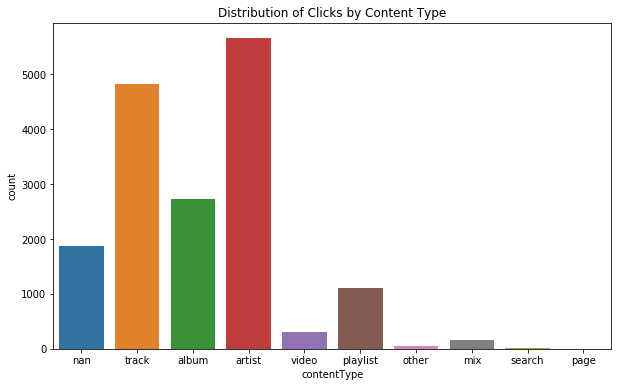

In [735]:
#coercing the column's value type to str to avoid error in plotting 
click_search.contentType = click_search.contentType.astype(str)


plt.figure(figsize=(10, 6)) 
sns.countplot(click_search.contentType).set(title='Distribution of Clicks by Content Type')
plt.savefig("Images/content_click_distribution.png")
;

Artist are clicked the most, followed by individual tracks. videos, mixes, searches, and pages are rarely clicked. nans are clicks for navigation, etc.

I want to investigate the NaN rows values more closely:

In [19]:
#getting the value counts of pageId in rows where contentType is null(string)
click_search[click_search['contentType'] == 'nan'].pageId.value_counts(dropna=False)

search         1288
search_serp     433
NaN             151
Name: pageId, dtype: int64

In [20]:
click_search[click_search['contentType'] == 'nan'].endResult.value_counts(dropna=False)

cancelSearch    957
navigation      915
Name: endResult, dtype: int64

In [21]:
#getting the value counts of contentId in rows where contentType is null(string)

click_search[click_search['contentType'] == 'nan'].contentId.value_counts(dropna=False).to_frame()

,contentId
NaN,1813
the black,19
erich kunzel happy,17
the artic,8
rainchy,2
wolfgang leibnitz,2
magenta magenta,2
happy trails,2
bittersweet symphony,2
barry lyndon,2


(!) So these are all problems here... the contentId's, for rows where the 'contentType' is 'nan', is supposed to just be a numerical id for the content, not any string of query or file path. 

In [22]:
for column in click_search.columns:
    print("---- %s ---" % column)
    print(click_search[column].value_counts(dropna=False), '\n')

---- dt ---
2021-02-06    2700
2021-02-01    2596
2021-02-05    2572
2021-02-07    2507
2021-02-04    2331
2021-02-03    2179
2021-02-02    1832
Name: dt, dtype: int64 

---- client_platform ---
desktop    6775
iOS        5292
android    4650
Name: client_platform, dtype: int64 

---- event_name ---
click_search    16717
Name: event_name, dtype: int64 

---- user_id ---
718     301
533     256
640     243
1069    222
967     210
       ... 
1178      1
99        1
38        1
1194      1
16        1
Name: user_id, Length: 1171, dtype: int64 

---- event_ts ---
1612411254406    9
1612252268076    8
1612518893238    6
1612166971287    5
1612710677060    4
                ..
1612317336430    1
1612634794863    1
1612629351273    1
1612722504554    1
1612377577659    1
Name: event_ts, Length: 15626, dtype: int64 

---- server_ts ---
1612340226    40
1612573693    29
1612655306    26
1612218194    25
1612145070    23
              ..
1612466017     1
1612574564     1
1612363631     1
161250

## ^ Avg. length of queries

In [23]:
search_query.head()

,dt,user_id,server_ts,query,queryUuid,trackResults,artistResults,albumResults,videoResults,responseTime,topResults
0,2021-02-07,1094,1612718227,georg benda,8698c2dc-fd4e-4f2b-81e1-c79601cd5f7a,"[{""id"":""11363806"",""popularityWW"":""0""},{""id"":""1...","[{""id"":""12388224"",""popularityWW"":""0""},{""id"":""2...","[{""id"":""165946610"",""popularityCountry"":""2""},{""...",[],"{""track"":16,""video"":4,""artist"":18,""album"":10,""...","[{""id"":165946610,""contentType"":""Album""},{""id"":..."
1,2021-02-07,863,1612726941,in,98ffcc2e-f84e-4587-80fd-89e1b178225d,"[{""id"":""134858528"",""popularityCountry"":""97""},{...","[{""id"":""24053"",""popularityCountry"":""48""},{""id""...","[{""id"":""52885530"",""popularityCountry"":""90""},{""...","[{""id"":""37690657"",""popularityCountry"":""62""},{""...","{""track"":92,""video"":16,""artist"":74,""album"":39,...","[{""id"":134858528,""contentType"":""Track""},{""id"":..."
2,2021-02-07,850,1612715317,jid,83a827ae-a93e-4148-88a1-c9f2715b886a,"[{""id"":""108769424"",""popularityCountry"":""64""},{...","[{""id"":""7061089"",""popularityCountry"":""92""},{""i...","[{""id"":""100122410"",""popularityCountry"":""76""},{...","[{""id"":""120672680"",""popularityCountry"":""39""},{...","{""track"":9,""video"":6,""artist"":11,""album"":6,""pl...","[{""id"":7061089,""contentType"":""Artist""},{""id"":1..."
3,2021-02-07,49,1612725870,Benz window,2487a99a-efb9-41ee-8f8d-e4203ea22f4c,"[{""id"":""102847894"",""popularityWW"":""0""},{""id"":""...","[{""id"":""11408668"",""popularityWW"":""0""}]",[],[],"{""track"":35,""video"":4,""artist"":34,""album"":10,""...","[{""id"":46783326,""contentType"":""Playlist""},{""id..."
4,2021-02-07,231,1612726235,London homesick,a1ad34dd-0927-42cf-84f4-e9c6fafbfb86,"[{""id"":""35717236"",""popularityCountry"":""4""},{""i...",[],[],[],"{""track"":71,""video"":14,""artist"":32,""album"":33,...","[{""id"":7896962,""contentType"":""Playlist""},{""id""..."


In [24]:
search_query.isna().sum()

dt               0
user_id          0
server_ts        0
query            0
queryUuid        0
trackResults     0
artistResults    0
albumResults     0
videoResults     0
responseTime     0
topResults       0
dtype: int64

In [25]:
#total number of queries
num_queries = len(search_query['query'])

#length of value, for each value in 'query'
lengths = [len(i) for i in search_query['query']]

#avg
print('Average length of queries:', sum(lengths)/num_queries, 'characters')


Average length of queries: 7.20341726618705 characters


## ^CTR (click-through rate) by client platform

**First impression = returned results**

**click = click_search** on content

In [26]:
search_query.head()

,dt,user_id,server_ts,query,queryUuid,trackResults,artistResults,albumResults,videoResults,responseTime,topResults
0,2021-02-07,1094,1612718227,georg benda,8698c2dc-fd4e-4f2b-81e1-c79601cd5f7a,"[{""id"":""11363806"",""popularityWW"":""0""},{""id"":""1...","[{""id"":""12388224"",""popularityWW"":""0""},{""id"":""2...","[{""id"":""165946610"",""popularityCountry"":""2""},{""...",[],"{""track"":16,""video"":4,""artist"":18,""album"":10,""...","[{""id"":165946610,""contentType"":""Album""},{""id"":..."
1,2021-02-07,863,1612726941,in,98ffcc2e-f84e-4587-80fd-89e1b178225d,"[{""id"":""134858528"",""popularityCountry"":""97""},{...","[{""id"":""24053"",""popularityCountry"":""48""},{""id""...","[{""id"":""52885530"",""popularityCountry"":""90""},{""...","[{""id"":""37690657"",""popularityCountry"":""62""},{""...","{""track"":92,""video"":16,""artist"":74,""album"":39,...","[{""id"":134858528,""contentType"":""Track""},{""id"":..."
2,2021-02-07,850,1612715317,jid,83a827ae-a93e-4148-88a1-c9f2715b886a,"[{""id"":""108769424"",""popularityCountry"":""64""},{...","[{""id"":""7061089"",""popularityCountry"":""92""},{""i...","[{""id"":""100122410"",""popularityCountry"":""76""},{...","[{""id"":""120672680"",""popularityCountry"":""39""},{...","{""track"":9,""video"":6,""artist"":11,""album"":6,""pl...","[{""id"":7061089,""contentType"":""Artist""},{""id"":1..."
3,2021-02-07,49,1612725870,Benz window,2487a99a-efb9-41ee-8f8d-e4203ea22f4c,"[{""id"":""102847894"",""popularityWW"":""0""},{""id"":""...","[{""id"":""11408668"",""popularityWW"":""0""}]",[],[],"{""track"":35,""video"":4,""artist"":34,""album"":10,""...","[{""id"":46783326,""contentType"":""Playlist""},{""id..."
4,2021-02-07,231,1612726235,London homesick,a1ad34dd-0927-42cf-84f4-e9c6fafbfb86,"[{""id"":""35717236"",""popularityCountry"":""4""},{""i...",[],[],[],"{""track"":71,""video"":14,""artist"":32,""album"":33,...","[{""id"":7896962,""contentType"":""Playlist""},{""id""..."


In [27]:
search_result.head()

,dt,client_platform,event_name,user_id,event_ts,server_ts,query,searchUuid,queryUuid
0,2021-02-06,iOS,search_result,250,1612639179188,1612639179,The,1612639176586.041507019172635133,2574e1b5-023f-49e7-bfca-94bc1630fa57
1,2021-02-06,iOS,search_result,987,1612643266165,1612643266,S,1612643264805.0175305242380418880,4c9dea6e-069f-4f56-8f98-9a354d498f46
2,2021-02-06,iOS,search_result,266,1612649431495,1612649431,Full of smoke,1612649421092.042425692113708085,c27b2912-b7ba-4642-b663-83ebba4bca7d
3,2021-02-06,android,search_result,773,1612644037697,1612644069,microphones in,0b61e3c2-091e-4273-b15a-e3e80326a81d,015c5ac7-1d33-4788-95eb-bed1cd1dd422
4,2021-02-06,android,search_result,773,1612644463249,1612644488,blue fla,72433904-257a-4899-ad11-cafca503381a,a8032920-6fe6-4e34-8b7d-860ab9cbeb75


Re-clarifying for myself: search_result encapsulates what is actually showing in the result through the queryUuid. What is showing through each result event can be seen by joining those two dfs. However I'm only concerned with *if* a result is showing and not with *what* is showing.

In [28]:
click_search.head()

,dt,client_platform,event_name,user_id,event_ts,server_ts,searchUuid,queryUuid,pageId,endResult,contentType,contentId,contentPlacement,moduleId,buttonId
0,2021-02-02,android,click_search,951,1612233213601,1612233291,bb45102e-0efe-45e3-8298-c74728c0dcb4,NaN,search,cancelSearch,nan,NaN,NaN,NaN,xSearch
1,2021-02-02,android,click_search,951,1612233225774,1612233291,bb45102e-0efe-45e3-8298-c74728c0dcb4,5fa761dd-f937-4431-903d-cc2d31b8b5bd,search,playback,track,109582305,1.0,search_topresult,NaN
2,2021-02-02,iOS,click_search,1128,1612233621630,1612233621,1612233604129.0176685845395195847,f6355ee9-e522-4a12-8839-3bba00e561fb,search,playback,track,70170184,1.0,search_topresult,NaN
3,2021-02-02,iOS,click_search,177,1612233483273,1612233483,1612232865985.036730574371815387,49a5b5d3-1cec-48cd-8686-b1abe942e66e,search,navigation,album,160351543,4.0,search_topresult,NaN
4,2021-02-02,iOS,click_search,177,1612232890509,1612232891,1612232865985.036730574371815387,49a5b5d3-1cec-48cd-8686-b1abe942e66e,search,navigation,artist,4332277,0.0,search_topresult,NaN


More notes: 

As we can see in the first two rows for the click_search df, there are matching searchUuids, but only one queryUuid. The NaN for missing queryUuid would not be considered an impression as the endResult was just cancelSearch. In otherwords, if there is no queryUuid, there is no impression, no results seen. The amount of queryUuids is what we want.

There are matching queryUuids (with the same searchUuid) for two separate click events. In other words, the same impression has two clicks. 

In [29]:
#exploring a highly used queryUuid
search_result[search_result.queryUuid == '543c49d9-fb71-429c-9ad7-cfc173b285a2']

,dt,client_platform,event_name,user_id,event_ts,server_ts,query,searchUuid,queryUuid
2707,2021-02-01,desktop,search_result,455,1612199023367,1612199026,danny schiller,36dba697-9f8d-422e-a4a5-8a11c12de36b,543c49d9-fb71-429c-9ad7-cfc173b285a2
2708,2021-02-01,desktop,search_result,455,1612199023547,1612199026,danny schiller,b386350d-9b70-4ac7-b88c-27e489949a05,543c49d9-fb71-429c-9ad7-cfc173b285a2
14383,2021-02-02,desktop,search_result,455,1612224806731,1612224808,danny schiller,b0863dc8-a237-4274-a978-bd28e6a1cc9c,543c49d9-fb71-429c-9ad7-cfc173b285a2
14384,2021-02-02,desktop,search_result,455,1612224805365,1612224808,danny schiller,7d5f21a5-637e-405c-abef-3b01f98f1558,543c49d9-fb71-429c-9ad7-cfc173b285a2
17241,2021-02-02,desktop,search_result,455,1612224806562,1612224808,danny schiller,8091a623-8c61-417d-a34a-9080811f56bf,543c49d9-fb71-429c-9ad7-cfc173b285a2
17242,2021-02-02,desktop,search_result,455,1612224806901,1612224808,danny schiller,f7c2879d-e0b5-4247-85d5-901e55e811cd,543c49d9-fb71-429c-9ad7-cfc173b285a2
17243,2021-02-02,desktop,search_result,455,1612224805208,1612224808,danny schiller,a1ec1db0-79d3-4dab-b9bd-7d9dda3a9a26,543c49d9-fb71-429c-9ad7-cfc173b285a2
17244,2021-02-02,desktop,search_result,455,1612224807487,1612224808,s,abb29267-1ce0-4561-957e-1e87f0d83c78,543c49d9-fb71-429c-9ad7-cfc173b285a2
17245,2021-02-02,desktop,search_result,455,1612224805583,1612224808,danny schiller,66731157-c060-4db9-9134-efdf42ca77e7,543c49d9-fb71-429c-9ad7-cfc173b285a2


In [78]:
#left joining search_result with clicks. left join for total impressions
impr_n_clicks = pd.merge(search_result, click_search, on='searchUuid', how='left')
impr_n_clicks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53514 entries, 0 to 53513
Data columns (total 23 columns):
dt_x                 53514 non-null object
client_platform_x    53514 non-null object
event_name_x         53514 non-null object
user_id_x            53514 non-null int64
event_ts_x           53514 non-null int64
server_ts_x          53514 non-null int64
query                53486 non-null object
searchUuid           53514 non-null object
queryUuid_x          53486 non-null object
dt_y                 47201 non-null object
client_platform_y    47201 non-null object
event_name_y         47201 non-null object
user_id_y            47201 non-null float64
event_ts_y           47201 non-null float64
server_ts_y          47201 non-null float64
queryUuid_y          45467 non-null object
pageId               45290 non-null object
endResult            47201 non-null object
contentType          47201 non-null object
contentId            40091 non-null object
contentPlacement     38225 non-

We can see there are more rows returned than are present in search_result again, which means that there are numerous matching rows in click_search (ie. the same query being typed out as we saw earlier). But if there are queryUuids, all of those count as impressions.

In [79]:
impr_n_clicks.head()

,dt_x,client_platform_x,event_name_x,user_id_x,event_ts_x,server_ts_x,query,searchUuid,queryUuid_x,dt_y,client_platform_y,event_name_y,user_id_y,event_ts_y,server_ts_y,queryUuid_y,pageId,endResult,contentType,contentId,contentPlacement,moduleId,buttonId
0,2021-02-06,iOS,search_result,250,1612639179188,1612639179,The,1612639176586.041507019172635133,2574e1b5-023f-49e7-bfca-94bc1630fa57,2021-02-06,iOS,click_search,250.0,1.612639e+12,1.612639e+09,4672df43-4770-4e2c-8edc-a81b56c3349e,search,playback,track,77750066,NaN,NaN,NaN
1,2021-02-06,iOS,search_result,987,1612643266165,1612643266,S,1612643264805.0175305242380418880,4c9dea6e-069f-4f56-8f98-9a354d498f46,2021-02-06,iOS,click_search,987.0,1.612643e+12,1.612643e+09,aeea9cac-4e09-4023-9714-5fa77aed762a,search,navigation,artist,4942474,0.0,search_topresult,NaN
2,2021-02-06,iOS,search_result,266,1612649431495,1612649431,Full of smoke,1612649421092.042425692113708085,c27b2912-b7ba-4642-b663-83ebba4bca7d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-06,android,search_result,773,1612644037697,1612644069,microphones in,0b61e3c2-091e-4273-b15a-e3e80326a81d,015c5ac7-1d33-4788-95eb-bed1cd1dd422,2021-02-06,android,click_search,773.0,1.612644e+12,1.612644e+09,4cb2ab96-7db1-4c08-b34b-1d65d2437cfb,search,playback,track,88969888,0.0,search_topresult,NaN
4,2021-02-06,android,search_result,773,1612644463249,1612644488,blue fla,72433904-257a-4899-ad11-cafca503381a,a8032920-6fe6-4e34-8b7d-860ab9cbeb75,2021-02-06,android,click_search,773.0,1.612644e+12,1.612644e+09,NaN,search,cancelSearch,nan,NaN,NaN,NaN,xSearch


In [80]:
#making sure there is only one type of event_name_y
impr_n_clicks.event_name_y.value_counts(dropna=False)

click_search    47201
NaN              6313
Name: event_name_y, dtype: int64

In [326]:
#count of impressions of any search results per platform
impressions = impr_n_clicks.groupby("client_platform_x")['event_name_x'].count()
impressions

client_platform_x
android    18630
desktop     4510
iOS        30374
Name: event_name_x, dtype: int64

In [73]:
#gathering events/rows that are only click_search on content per platform
clicks = impr_n_clicks[impr_n_clicks['event_name_y'] == 'click_search']

#counting only clicks on content (anything not NaN) by client platform
clicks_on_content = clicks[clicks['contentType'] != 'nan'].groupby("client_platform_y")['event_name_y'].count()
clicks_on_content

client_platform_y
android    13489
desktop     3516
iOS        26140
Name: event_name_y, dtype: int64

In [83]:
#creating new df, using the objects I created as rows and calculating CTR.
df = impressions.to_frame(name='impressions')
df['clicks_on_content'] = clicks_on_content
df['CTR'] = (clicks_on_content/impressions) * 100
df

,impressions,clicks_on_content,CTR
client_platform_x,,,
android,18630,13489,72.404724
desktop,4510,3516,77.960089
iOS,30374,26140,86.060446


Combining this process into a reusable function:

In [329]:
def calc_platform_ctr(search_result, click_search, ):
    #left joining search_result with clicks. left join for total impressions
    impr_n_clicks = pd.merge(search_result, click_search, on='searchUuid', how='left')
    
    #count of impressions of any search results per platform
    impressions = impr_n_clicks.groupby("client_platform_x")['event_name_x'].count()
    
    #gathering events/rows that are only click_search on content per platform
    clicks = impr_n_clicks[impr_n_clicks['event_name_y'] == 'click_search']
    
    #counting only clicks on content (anything not NaN) by client platform
    clicks_on_content = clicks[clicks['contentType'] != 'nan'].groupby("client_platform_y")['event_name_y'].count()
    
    #creating new df, using the objects I created as rows and calculating CTR.
    df = impressions.to_frame(name='impressions')
    df['clicks_on_content'] = clicks_on_content
    df['CTR'] = (clicks_on_content/impressions) * 100
    return df

In [330]:
calc_platform_ctr(search_result, click_search)

,impressions,clicks_on_content,CTR
client_platform_x,,,
android,18630,13489,72.404724
desktop,4510,3516,77.960089
iOS,30374,26140,86.060446


## ^Number of search clicks on topResults
As click events are simply just the rows of click_search, I want the number of events/clicks that are topresult.

In [36]:
click_search.moduleId.value_counts()

search_topresult       10625
search_album            1509
search_playlist          586
search_null              584
search_tracks            384
search_artists           227
search_albums            210
search_artist            195
search_mix               152
search_playlists         130
search_track             125
search_recentsearch       82
search_video              73
search_videos             32
Name: moduleId, dtype: int64

Curious as the what the counts are for contentPlacement clicks of the topresults.

In [37]:
click_search[click_search['moduleId'] == 'search_topresult'].contentPlacement.value_counts()

 0.0     4705
 1.0     3078
 2.0     1127
 3.0      627
 4.0      414
 5.0      227
 6.0      134
 7.0      104
 8.0       51
 9.0       38
 10.0      34
 11.0      25
 12.0      20
 13.0      14
-1.0        5
 14.0       5
Name: contentPlacement, dtype: int64

/Users/orin/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


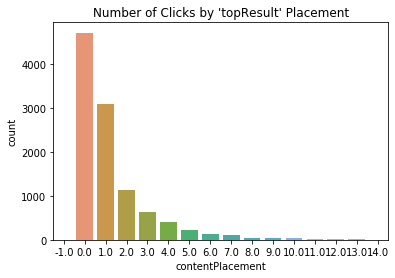

In [739]:
sns.countplot(click_search[click_search['moduleId'] == 'search_topresult'].contentPlacement).set(title="Number of Clicks by 'topResult' Placement");
plt.savefig("Images/clicks_by_topresult_placement.png")


As expected the most relevant results, the top ones, have more clicks. 

Also slight error here, -1.0 should be 1.0 I'm guessing!

## ^Average/Median time to click per search session

As there are numerous events for each sesssion, I want to start the time at the first event, and associate the click to the last event time.

In [38]:
initiate_search.head()

,dt,client_platform,event_name,user_id,event_ts,server_ts,method,searchUuid
0,2021-02-06,iOS,initiate_search,225,1612648404589,1612648405,clickInBar,1612648404588.040518700386519682
1,2021-02-05,iOS,initiate_search,95,1612565307151,1612565307,deleteSearch,1612565307150.03093909192593003
2,2021-02-05,iOS,initiate_search,95,1612564857792,1612564858,deleteSearch,1612564857791.03093909192593003
3,2021-02-05,iOS,initiate_search,95,1612565891804,1612565892,deleteSearch,1612565891803.03093909192593003
4,2021-02-05,iOS,initiate_search,95,1612564856980,1612564857,searchButton,1612564856977.03093909192593003


Could look at time to search from final searchbutton, which would discount typos and things like that from defining the start of the search session (user's fault). 

content type can't be NaN, end of session is click on content, not a click ending in cancelSearch

In [475]:
#click_df should not contain any nulls for content (signifying the end of the search)
end_of_session = click_search[click_search['contentType'] != 'nan']
end_of_session.head()

,dt,client_platform,event_name,user_id,event_ts,server_ts,searchUuid,queryUuid,pageId,endResult,contentType,contentId,contentPlacement,moduleId,buttonId
1,2021-02-02,android,click_search,951,1612233225774,1612233291,bb45102e-0efe-45e3-8298-c74728c0dcb4,5fa761dd-f937-4431-903d-cc2d31b8b5bd,search,playback,track,109582305,1.0,search_topresult,NaN
2,2021-02-02,iOS,click_search,1128,1612233621630,1612233621,1612233604129.0176685845395195847,f6355ee9-e522-4a12-8839-3bba00e561fb,search,playback,track,70170184,1.0,search_topresult,NaN
3,2021-02-02,iOS,click_search,177,1612233483273,1612233483,1612232865985.036730574371815387,49a5b5d3-1cec-48cd-8686-b1abe942e66e,search,navigation,album,160351543,4.0,search_topresult,NaN
4,2021-02-02,iOS,click_search,177,1612232890509,1612232891,1612232865985.036730574371815387,49a5b5d3-1cec-48cd-8686-b1abe942e66e,search,navigation,artist,4332277,0.0,search_topresult,NaN
5,2021-02-02,desktop,click_search,52,1612231661540,1612231602,4404dfd9-3ffb-4071-ad25-20d8368f9e0a,12761cd1-d609-46c2-8bf7-fb480d7d8b52,search_serp,navigation,album,5118181,4.0,search_topresult,NaN


Some sessions have click endings but then more clicking... but we are just looking at time to first click on content.

In [528]:
def get_time_to_click(initiate_search, click_search):
    #click_df should not contain any nulls for content (signifying the end of the search)
    end_of_session = click_search[click_search['contentType'] != 'nan']
    
    #inner join for just iniate_search rows with clicks
    init_to_click = pd.merge(initiate_search, end_of_session, on='searchUuid', how='inner')

    #get first/minimum event_ts_x in search session, add to init_to_click df
    search_group = init_to_click.groupby('searchUuid')['event_ts_x']
    init_to_click['session_start_time' ] = search_group.transform('min')

    #get min event_ts_y for first click on content
    first_click_group = init_to_click.groupby('searchUuid')['event_ts_y']
    init_to_click['session_first_click_time'] = first_click_group.transform('min')

    #df of just search initiations (min event_ts_x) and their first clicks (min event_ts_y)
    start_to_click = init_to_click[(init_to_click['event_ts_x'] == init_to_click['session_start_time']) &
                                   (init_to_click['event_ts_y'] == init_to_click['session_first_click_time'])]

    #subtracting last event timestamp from first timestamp
    start_to_click['time_to_click'] = start_to_click['session_first_click_time'] - start_to_click['session_start_time']

    #this showed me there are clicks at the same initiate_search time, perhaps events triggered by clicking results 
    #already present on the search page? This only happens on desktop. maybe app doesn't have content on the search page?
    # first_searches[first_searches['time_to_click'] == 0]

    #this showed me there are 2 negative times, errors?
    start_to_click = start_to_click[start_to_click['time_to_click'] >= 0]

    print("Median time to click per search session:", start_to_click['time_to_click'].median() / 1000, 'seconds')
    return start_to_click
    
get_time_to_click(initiate_search, click_search)

Median time to click per search session: 7.5965 seconds


/Users/orin/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,dt_x,client_platform_x,event_name_x,user_id_x,event_ts_x,server_ts_x,method,searchUuid,dt_y,client_platform_y,event_name_y,user_id_y,event_ts_y,server_ts_y,queryUuid,pageId,endResult,contentType,contentId,contentPlacement,moduleId,buttonId,session_start_time,session_first_click_time,time_to_click
0,2021-02-05,iOS,initiate_search,95,1612564857792,1612564858,deleteSearch,1612564857791.03093909192593003,2021-02-05,iOS,click_search,95,1612564874244,1612564874,26a451cd-31c8-42e3-a88a-b66a7cf7be5a,search,playback,track,50880918,0.0,search_topresult,NaN,1612564857792,1612564874244,16452
1,2021-02-05,iOS,initiate_search,95,1612565891804,1612565892,deleteSearch,1612565891803.03093909192593003,2021-02-05,iOS,click_search,95,1612566280533,1612566280,d4372bf3-9763-4731-8724-4298ebeaa3e9,search,navigation,artist,3520799,0.0,search_topresult,NaN,1612565891804,1612566280533,388729
3,2021-02-06,android,initiate_search,1102,1612646931173,1612647163,deleteSearch,81516896-b791-4ba7-a6b5-1d16850a17b0,2021-02-06,android,click_search,1102,1612646939644,1612647163,b66bb248-1a7c-48d5-9e90-51ddf9743863,search,playback,track,88580033,0.0,search_topresult,NaN,1612646931173,1612646939644,8471
4,2021-02-06,android,initiate_search,1102,1612646855379,1612647163,deleteSearch,3d3262ee-843b-4f8e-8438-77d09d1b6542,2021-02-06,android,click_search,1102,1612646867099,1612647163,293922d7-b690-48cd-b941-498246f88219,search,playback,track,142914478,0.0,search_topresult,NaN,1612646855379,1612646867099,11720
6,2021-02-06,android,initiate_search,1102,1612647059633,1612647163,clickInBar,08d26fdc-3ad9-492f-b376-20e5204c3d9e,2021-02-06,android,click_search,1102,1612647067306,1612647163,3318e7c6-d886-463a-bee6-a0f4001220f1,search,navigation,album,151132969,0.0,search_topresult,NaN,1612647059633,1612647067306,7673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12985,2021-02-07,android,initiate_search,1041,1612683976980,1612684021,clickInBar,39aa31d5-5809-4387-9c33-048b4f0e2a68,2021-02-07,android,click_search,1041,1612684011934,1612684021,2f9046dc-7938-40f2-9442-df4acfa5bf38,search,navigation,playlist,549e6e94-05f2-4c5c-91d5-92a08a03665a,5.0,search_topresult,NaN,1612683976980,1612684011934,34954
12986,2021-02-05,iOS,initiate_search,405,1612508872967,1612508873,clickInBar,1612508872461.059251007267119205,2021-02-05,iOS,click_search,405,1612508876451,1612508876,36f1fcef-87e1-4ced-83b7-e57b68235106,search,navigation,artist,7301626,0.0,search_topresult,NaN,1612508872967,1612508876451,3484
12987,2021-02-05,iOS,initiate_search,358,1612508879950,1612508881,deleteSearch,1612508879947.05073037036991279,2021-02-05,iOS,click_search,358,1612508888191,1612508888,1242c120-33e6-44ba-9717-2799bcfb52fa,search,navigation,artist,9160820,0.0,search_topresult,NaN,1612508879950,1612508888191,8241
12992,2021-02-07,desktop,initiate_search,909,1612682319977,1612682320,directType,ea7b84e6-8c2d-4c18-a8d3-b99fef9e2886,2021-02-07,desktop,click_search,909,1612682319977,1612682320,50f84a76-177c-4351-9095-a69d8c7ebf8c,eyJwIjoiZTZlM2ZmMWItZDZjNC00NzczLTg4ZDAtMGNmOT...,navigation,artist,3614028,19.0,search_artist,NaN,1612682319977,1612682319977,0


## ^Number of search sessions with a query that had zero search results

Sound like I should count the NaN rows in an outer-joined (search_query + search_result) df

actually, search results that resulted in no query ran- a little backwards.

In [360]:
#outer join for all results + any backend querying
all_queries_and_results = pd.merge(search_result, search_query, on='queryUuid', how='outer')

#filtering out some empty searches and getting df where search_query is nothing/NaN
query_zero_results = all_queries_and_results[(all_queries_and_results['query_x'].notnull()) &
                                                     (all_queries_and_results['query_y'].isna())]
    
display(query_zero_results.head())

#need unique search sessions
print('Number of search sessions with a query that had zero search results:', len(query_zero_results.searchUuid.unique()))

,dt_x,client_platform,event_name,user_id_x,event_ts,server_ts_x,query_x,searchUuid,queryUuid,dt_y,user_id_y,server_ts_y,query_y,trackResults,artistResults,albumResults,videoResults,responseTime,topResults
204,2021-02-06,android,search_result,44,1611970726034,1612635533,c,87b3b59f-542f-4967-8d61-9516574cbc97,a52ad892-8b3b-40ef-ab52-7d5a3ac9ecac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,2021-02-06,android,search_result,44,1611970727718,1612635533,cupi,87b3b59f-542f-4967-8d61-9516574cbc97,4e6e017a-38a9-486d-8d2b-7338e56340f3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,2021-02-06,android,search_result,44,1611970729194,1612635533,cupid,87b3b59f-542f-4967-8d61-9516574cbc97,5946d63c-acad-45d6-a500-3a779337204e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,2021-02-06,android,search_result,44,1611970728468,1612635533,cupid,87b3b59f-542f-4967-8d61-9516574cbc97,b8ab71cf-eb89-44c0-ae1f-90cee4d85a92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
671,2021-02-05,android,search_result,1066,1611438192636,1612569263,21,5bf1292a-085e-49cc-bc1f-46afe7b745df,505d23ba-437e-4c0c-a502-fcbdc6f14982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Number of search sessions with a query that had zero search results: 365


# A look at user_metadata

In [364]:
user_metadata

,user_id,birthday,gender,countryCode,free,churned,subscriptionType,age
0,730,1993-04-29,NaN,US,False,False,PREMIUM_PLUS,27.0
1,338,NaN,NaN,DE,False,False,PREMIUM,NaN
2,435,NaN,NaN,DE,False,False,PREMIUM_PLUS,NaN
3,829,1998-12-30,f,US,False,False,PREMIUM,22.0
4,1075,NaN,m,DE,False,False,PREMIUM_PLUS,NaN
...,...,...,...,...,...,...,...,...
1195,992,NaN,NaN,US,False,False,PREMIUM_PLUS,NaN
1196,120,1998-11-16,m,CA,False,False,PREMIUM,22.0
1197,255,NaN,NaN,DK,False,False,PREMIUM,NaN
1198,1107,1959-06-04,NaN,NL,False,False,PREMIUM_PLUS,61.0


I'm definitely interested in churned users! Why?!

In [43]:
user_metadata.churned.value_counts()

False    1157
True       43
Name: churned, dtype: int64

In [45]:
churned_users = user_metadata[user_metadata.churned == True]
churned_users

,user_id,birthday,gender,countryCode,free,churned,subscriptionType
29,650,1973-03-02,NaN,IT,False,True,INTRO
49,121,NaN,m,PL,False,True,INTRO
121,1163,2001-05-14,NaN,US,False,True,INTRO
127,642,1972-12-10,NaN,US,False,True,INTRO
142,828,NaN,NaN,US,False,True,INTRO
171,899,NaN,NaN,US,False,True,INTRO
223,1160,NaN,NaN,US,False,True,INTRO
260,932,1997-05-24,NaN,DE,False,True,INTRO
272,1171,1998-12-21,NaN,RO,False,True,INTRO
308,592,1942-09-25,m,SE,False,True,INTRO


## User Churn rate

In [716]:
print('User Churn rate:', round((len(user_metadata[user_metadata.churned == True])*100)/len(user_metadata), 3),  '%')
print('Number of users churned:', len(user_metadata[user_metadata.churned == True]))

User Churn rate: 3.583 %
Number of users churned: 43


I'm a little confused as to these churned intro accounts, shouldn't they all be free = True for the intro trial? Let's if any of these churned users had zero results in their search query sessions.

## Number of search sessions with zero results by churn status
Looking to answer the question of whether churned users experienced a different rate of search sessions with zero results.

In [374]:
#renaming user_id_x column so I can merge with churned user_metadata
query_zero_results.rename(columns={'user_id_x':'user_id'}, inplace=True)

#merging with user_metadata
zero_results_users = pd.merge(query_zero_results, user_metadata, on='user_id', how='inner')
# display(zero_results_users.head())

print('Number of search sessions with zero results by churned users:', len(zero_results_users[zero_results_users['churned'] == True].searchUuid.unique()))
print('Number of search sessions with zero results by returning users:', len(zero_results_users[zero_results_users['churned'] == False].searchUuid.unique()))


Number of search sessions with zero results by churned users: 26
Number of search sessions with zero results by returning users: 339


## CTR by churn status
Let's look at CTR of churned users compared to non-churned.

In [85]:
impr_n_clicks.rename(columns={'user_id_x':'user_id'}, inplace=True)

In [108]:
#outer join will let me calculate churned and non-churned. *Remember, impr_n_clicks is all search_result (impressions)
#with click_search (clicks).

impr_clicks_w_churned = pd.merge(impr_n_clicks, user_metadata, on='user_id', how='left')
impr_clicks_w_churned

,dt_x,client_platform_x,event_name_x,user_id,event_ts_x,server_ts_x,query,searchUuid,queryUuid_x,dt_y,client_platform_y,event_name_y,user_id_y,event_ts_y,server_ts_y,queryUuid_y,pageId,endResult,contentType,contentId,contentPlacement,moduleId,buttonId,birthday,gender,countryCode,free,churned,subscriptionType
0,2021-02-06,iOS,search_result,250,1612639179188,1612639179,The,1612639176586.041507019172635133,2574e1b5-023f-49e7-bfca-94bc1630fa57,2021-02-06,iOS,click_search,250.0,1.612639e+12,1.612639e+09,4672df43-4770-4e2c-8edc-a81b56c3349e,search,playback,track,77750066,NaN,NaN,NaN,NaN,NaN,US,False,False,PREMIUM
1,2021-02-06,iOS,search_result,987,1612643266165,1612643266,S,1612643264805.0175305242380418880,4c9dea6e-069f-4f56-8f98-9a354d498f46,2021-02-06,iOS,click_search,987.0,1.612643e+12,1.612643e+09,aeea9cac-4e09-4023-9714-5fa77aed762a,search,navigation,artist,4942474,0.0,search_topresult,NaN,2002-04-25,NaN,US,False,False,PREMIUM
2,2021-02-06,iOS,search_result,266,1612649431495,1612649431,Full of smoke,1612649421092.042425692113708085,c27b2912-b7ba-4642-b663-83ebba4bca7d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,False,False,PREMIUM
3,2021-02-06,android,search_result,773,1612644037697,1612644069,microphones in,0b61e3c2-091e-4273-b15a-e3e80326a81d,015c5ac7-1d33-4788-95eb-bed1cd1dd422,2021-02-06,android,click_search,773.0,1.612644e+12,1.612644e+09,4cb2ab96-7db1-4c08-b34b-1d65d2437cfb,search,playback,track,88969888,0.0,search_topresult,NaN,1979-03-07,m,PT,False,False,PREMIUM
4,2021-02-06,android,search_result,773,1612644463249,1612644488,blue fla,72433904-257a-4899-ad11-cafca503381a,a8032920-6fe6-4e34-8b7d-860ab9cbeb75,2021-02-06,android,click_search,773.0,1.612644e+12,1.612644e+09,NaN,search,cancelSearch,nan,NaN,NaN,NaN,xSearch,1979-03-07,m,PT,False,False,PREMIUM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53509,2021-02-05,iOS,search_result,823,1612546450845,1612546451,Appara,1612546447622.0172264358380824149,34780a88-3b99-48e4-bd55-01f86f2a735f,2021-02-05,iOS,click_search,823.0,1.612546e+12,1.612546e+09,134ff9cf-c6ec-45ed-bbd4-62f8da916cb4,search,playback,track,169139922,1.0,search_topresult,NaN,NaN,NaN,IT,False,False,PREMIUM_PLUS
53510,2021-02-05,iOS,search_result,823,1612546453174,1612546453,Apparat da,1612546447622.0172264358380824149,50a474d9-c3c6-4a26-8d56-77e4079c5e38,2021-02-05,iOS,click_search,823.0,1.612546e+12,1.612546e+09,134ff9cf-c6ec-45ed-bbd4-62f8da916cb4,search,playback,track,169139922,1.0,search_topresult,NaN,NaN,NaN,IT,False,False,PREMIUM_PLUS
53511,2021-02-07,iOS,search_result,830,1612727748908,1612727749,Bast,1612727745346.0172393092301387409,355aa941-ac2d-4418-ad9d-c74698e5cca1,2021-02-07,iOS,click_search,830.0,1.612728e+12,1.612728e+09,038ac861-ed44-49af-a43f-6bee88742939,search,navigation,artist,4526830,0.0,search_topresult,NaN,1995-07-04,NaN,PT,False,False,PREMIUM
53512,2021-02-07,iOS,search_result,830,1612727747681,1612727747,Bas,1612727745346.0172393092301387409,23434f85-0c06-47af-aa50-55e9da7f0030,2021-02-07,iOS,click_search,830.0,1.612728e+12,1.612728e+09,038ac861-ed44-49af-a43f-6bee88742939,search,navigation,artist,4526830,0.0,search_topresult,NaN,1995-07-04,NaN,PT,False,False,PREMIUM


In [112]:
impr_clicks_w_churned.queryUuid_x.value_counts(dropna=False)

b9b00dff-40fe-4c51-8a34-2afa6b808c3a    66
offline                                 46
ff931ebc-7d87-4fff-957f-4695510afb3a    44
fbf93102-1833-4e75-a5e1-519f140940c1    44
60584ca3-0df5-4a7d-a429-5b0246975423    44
                                        ..
d890adfd-fdbd-4fb5-8a9b-8c658d08bf1e     1
5b4d6f91-8848-4b7d-81ea-580ab0769b4d     1
76a6f640-7c0e-42cd-a760-560b875f7bba     1
ec96f749-36ca-4fa1-b1bc-3807072f99b1     1
bd890999-cfbd-425c-8cbe-a47985907f58     1
Name: queryUuid_x, Length: 28866, dtype: int64

Note: offline queries don't seem to be recorded

In [109]:
total_impressions = impr_clicks_w_churned.groupby("churned")['churned'].count()
total_impressions

churned
False    52158
True      1356
Name: churned, dtype: int64

In [114]:
#gathering events/rows that are only click_search
just_clicks = impr_clicks_w_churned[impr_clicks_w_churned['event_name_y'] == 'click_search']

#counting only clicks on content (anything not NaN) by churn status
clicks_content_by_churn = just_clicks[just_clicks['contentType'] != 'nan'].groupby("churned")['churned'].count()
clicks_content_by_churn

churned
False    42276
True       869
Name: churned, dtype: int64

In [383]:
#creating new df, using the objects I created as rows and calculating CTR.
churn_ctr = total_impressions.to_frame(name='impressions')
churn_ctr['clicks_churn'] = clicks_content_by_churn
churn_ctr['CTR_by_churn'] = (clicks_content_by_churn/total_impressions) * 100
churn_ctr.reset_index(inplace=True)
churn_ctr

,churned,impressions,clicks_churn,CTR_by_churn
0,False,52158,42276,81.053721
1,True,1356,869,64.085546


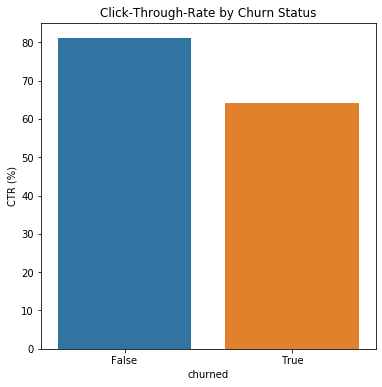

In [711]:
fig_dims = (6,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=churn_ctr.churned, y=churn_ctr.CTR_by_churn, ax=ax)
ax.set(ylabel='CTR (%)', title='Click-Through-Rate by Churn Status');
plt.savefig("Images/CTR_by_churn.png")

In [122]:
print('Difference in CTR between churned and returning users', round(churn_ctr['CTR_by_churn'][0] - churn_ctr['CTR_by_churn'][1], 3),'%')

Difference in CTR between churned and returning users 16.968 %


CTR of churned users is nearly 17% lower than users who returned.

Makes sense! If users are less likely to find the results they want, they are more likely to churn. 


I'm definitely interested in what these churned users were looking for and not finding on TIDAL.
## churned user searches with zero results

In [421]:
churned_search_no_results = zero_results_users[zero_results_users['churned'] == True]['query_x'].value_counts().head(20).to_frame()
churned_search_no_results.reset_index(inplace=True)
churned_search_no_results.rename(columns={'index':'query', 'query_x':'search_count'}, inplace=True)
churned_search_no_results


,query,search_count
0,salsa,5
1,y,3
2,bankrut bank,2
3,heyheyhey,2
4,letter to yo,2
5,lottery renegade,2
6,renegade,2
7,lorenegade,2
8,corona on my boner,2
9,the wre,2


Interesting results here: for example: Lottery (renegade) by K Camp is on tidal, so not sure why 'lottery renegade' returned no results.

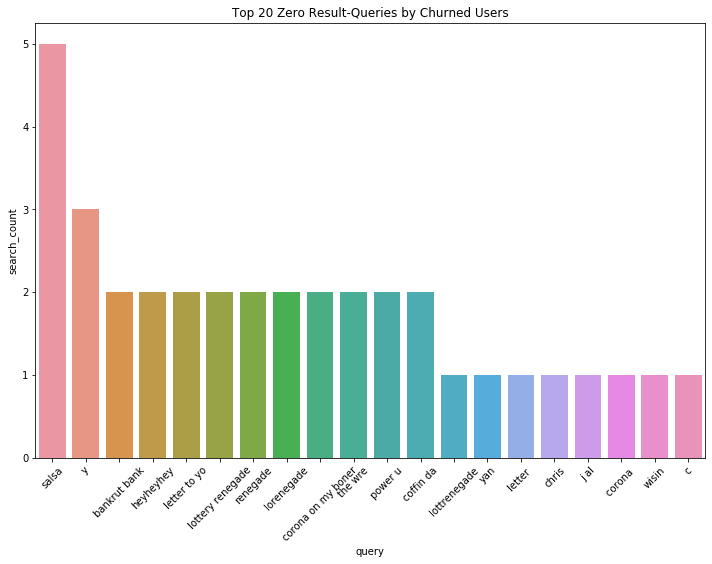

In [700]:
fig_dims = (12,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "query", y = "search_count", ax=ax, data=churned_search_no_results)
ax.set(title='Top 20 Zero Result-Queries by Churned Users');
plt.xticks(rotation=45)
plt.savefig("images/top20querybychurnedusers.png");

## users by country

/Users/orin/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


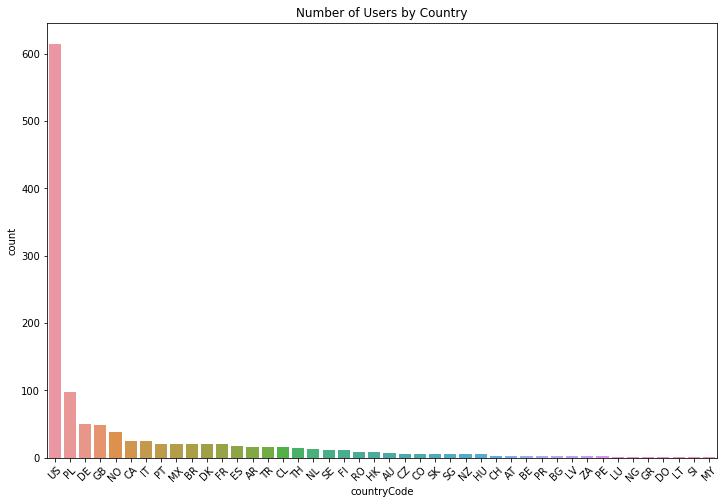

In [740]:
fig_dims = (12,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(user_metadata.countryCode, order = user_metadata.countryCode.value_counts().index)
ax.set(title='Number of Users by Country');
plt.xticks(rotation=45)
plt.savefig("images/usersbycountry.png");

## Median Age of Users

In [259]:
from datetime import datetime, date

In [322]:
def age(birthday):
    birthday = pd.to_datetime(birthday)
    today = date.today()
    return today.year - birthday.year - ((today.month, today.day) < 
                                     (birthday.month, birthday.day))


user_metadata['age'] = user_metadata['birthday'].apply(age)


print("Median User Age (out of 600 users):", user_metadata.age.median())

Median User Age (out of 600 users): 35.0


/Users/orin/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


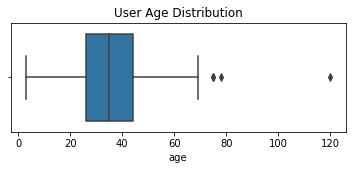

In [726]:
fig_dims = (6,2)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(user_metadata.age, ax=ax)
ax.set(title='User Age Distribution')
plt.savefig("Images/age_distribution.png")

This seems like no difference in age between churn status, although we dont have a very big sample of churned users who input their birthdays.

## Median time to click by churn status

In [524]:
df = get_time_to_click(initiate_search, click_search)

Median time to click per search session: 8.085 seconds


/Users/orin/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [525]:
df.rename(columns={'user_id_x':'user_id'}, inplace=True)
click_time_users = pd.merge(df, user_metadata, on='user_id', how='inner')
print("Median time to click per search session:", click_time_users.groupby('churned')['time_to_click'].median() / 1000, 'seconds')

Median time to click per search session: churned
False    8.0650
True     9.8115
Name: time_to_click, dtype: float64 seconds


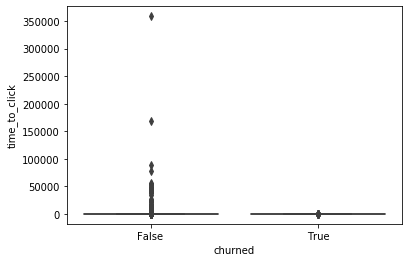

In [526]:
x = click_time_users['churned']
y = click_time_users['time_to_click']/1000
sns.boxplot(x=x, y=y)

Need to remove some outliers for better visualization...

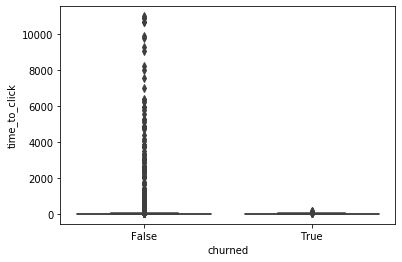

In [530]:
from scipy import stats
import numpy as np

df = click_time_users[(np.abs(stats.zscore(click_time_users.time_to_click)) < 2)]
x = df['churned']
y = df['time_to_click']/1000
sns.boxplot(x=x, y=y)

OK, disregard boxplot (very uneven distribution of values here). Going to go with barplot again, leaving outliers in.

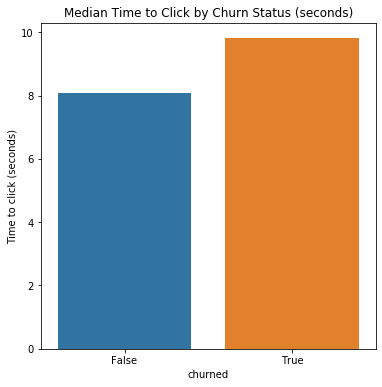

In [712]:
time_to_click = (click_time_users.groupby('churned')['time_to_click'].median() / 1000).to_frame()
time_to_click.reset_index(inplace=True)
time_to_click

x = time_to_click['churned']
y = time_to_click['time_to_click']

fig_dims = (6,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=x, y=y, ax=ax)
ax.set(ylabel='Time to click (seconds)', title='Median Time to Click by Churn Status (seconds)');
plt.savefig("Images/TTC_by_churn.png")

In [605]:
percent_increase = round(((time_to_click.time_to_click[1] * 100)/time_to_click.time_to_click[0]) - 100, 2)
      
print('Churned users took', percent_increase, '% longer time to click than returning users')

Churned users took 21.66 % longer time to click than returning users


## exploring 'churn' vs 'free' in user_metadata

In [198]:
click_search.head()


,dt,client_platform,event_name,user_id,event_ts,server_ts,searchUuid,queryUuid,pageId,endResult,contentType,contentId,contentPlacement,moduleId,buttonId
0,2021-02-02,android,click_search,951,1612233213601,1612233291,bb45102e-0efe-45e3-8298-c74728c0dcb4,NaN,search,cancelSearch,nan,NaN,NaN,NaN,xSearch
1,2021-02-02,android,click_search,951,1612233225774,1612233291,bb45102e-0efe-45e3-8298-c74728c0dcb4,5fa761dd-f937-4431-903d-cc2d31b8b5bd,search,playback,track,109582305,1.0,search_topresult,NaN
2,2021-02-02,iOS,click_search,1128,1612233621630,1612233621,1612233604129.0176685845395195847,f6355ee9-e522-4a12-8839-3bba00e561fb,search,playback,track,70170184,1.0,search_topresult,NaN
3,2021-02-02,iOS,click_search,177,1612233483273,1612233483,1612232865985.036730574371815387,49a5b5d3-1cec-48cd-8686-b1abe942e66e,search,navigation,album,160351543,4.0,search_topresult,NaN
4,2021-02-02,iOS,click_search,177,1612232890509,1612232891,1612232865985.036730574371815387,49a5b5d3-1cec-48cd-8686-b1abe942e66e,search,navigation,artist,4332277,0.0,search_topresult,NaN


In [225]:
user_metadata[user_metadata['free'] == True].groupby('subscriptionType').count()


,user_id,birthday,gender,countryCode,free,churned
subscriptionType,,,,,,
PREMIUM,24,13,2,24,24,24
PREMIUM_PLUS,73,60,9,73,73,73


In [240]:
clicksearch_user = pd.merge(click_search, user_metadata, on='user_id', how='inner')
clicksearch_user[(clicksearch_user['moduleId'] == 'search_topresult') & 
                 (clicksearch_user['churned'] == True)].head()


,dt,client_platform,event_name,user_id,event_ts,server_ts,searchUuid,queryUuid,pageId,endResult,contentType,contentId,contentPlacement,moduleId,buttonId,birthday,gender,countryCode,free,churned,subscriptionType
731,2021-02-01,iOS,click_search,932,1612183181449,1612183181,1612183175074.0174773008391047533,e67f88af-8e42-4e04-a2fe-028708a908b7,search,navigation,artist,8861976,1.0,search_topresult,NaN,1997-05-24,NaN,DE,False,True,INTRO
732,2021-02-01,iOS,click_search,932,1612183246274,1612183246,1612183238046.0174773008391047533,06058e92-4848-4cb6-8ad2-dc506636478e,search,navigation,artist,5057262,0.0,search_topresult,NaN,1997-05-24,NaN,DE,False,True,INTRO
2099,2021-02-03,iOS,click_search,1174,1612336916534,1612336916,1612336906161.0176956711398088912,826ad16a-4a52-4d6c-9071-db90cf55c332,search,navigation,artist,17288776,8.0,search_topresult,NaN,1983-01-01,NaN,PL,False,True,INTRO
6110,2021-02-04,android,click_search,969,1611942269397,1612472689,4df92c49-a032-4436-9d80-637428624fa3,add51c85-6017-43aa-ae8d-e2b82cfd60a3,search,navigation,artist,8625157,0.0,search_topresult,NaN,1984-04-06,m,US,False,True,INTRO
6111,2021-02-04,android,click_search,969,1611865773555,1612472689,5b10f991-cdc5-4ba7-903c-540960144de6,f3262386-9e9a-4ef7-b4f6-09386fa88cff,search,navigation,artist,16816,0.0,search_topresult,NaN,1984-04-06,m,US,False,True,INTRO


**free** = True if the user is in trial and has a free account, false if the user is not
in trial or has a free account.

**churned**  = True if the user is churned, false if the user is not churned.

For some reason, I think INTRO is supposed to mean a free account/trial. But free is marked as False for all churned accounts, which would most likely churn from intro accounts.

## top plays per user

In [597]:
# df only plays, songs contentIds per user
tracks_played = clicksearch_user[(clicksearch_user['endResult'] == 'playback') &
                                 (clicksearch_user['contentType'] == 'track')]

#getting playcounts for each unique contentId, putting into new df
play_count = tracks_played.groupby('user_id')['contentId'].value_counts().to_frame()

play_count.rename(columns={'contentId':'play_count'}, inplace=True)
play_count.reset_index(inplace=True)

#filtering df for content per user with max play_count
most_played_tracks = play_count.iloc[play_count.groupby('user_id')['play_count'].agg(pd.Series.idxmax)]

# most_played_tracks.drop(columns='play_count', inplace=True)
most_played_tracks.rename(columns={'contentId':'most_played_track'}, inplace=True)

#joining top tracks to user_metadata
users_top_tracks = pd.merge(user_metadata, most_played_tracks, on='user_id', how='outer')

users_top_tracks

,user_id,birthday,gender,countryCode,free,churned,subscriptionType,age,most_played_track,play_count
0,730,1993-04-29,NaN,US,False,False,PREMIUM_PLUS,27.0,NaN,NaN
1,338,NaN,NaN,DE,False,False,PREMIUM,NaN,NaN,NaN
2,435,NaN,NaN,DE,False,False,PREMIUM_PLUS,NaN,NaN,NaN
3,829,1998-12-30,f,US,False,False,PREMIUM,22.0,NaN,NaN
4,1075,NaN,m,DE,False,False,PREMIUM_PLUS,NaN,142399823,1.0
...,...,...,...,...,...,...,...,...,...,...
1195,992,NaN,NaN,US,False,False,PREMIUM_PLUS,NaN,NaN,NaN
1196,120,1998-11-16,m,CA,False,False,PREMIUM,22.0,102471126,1.0
1197,255,NaN,NaN,DK,False,False,PREMIUM,NaN,170820713,2.0
1198,1107,1959-06-04,NaN,NL,False,False,PREMIUM_PLUS,61.0,NaN,NaN


In [741]:
most_played_tracks

,user_id,most_played_track,play_count
0,1,105266850,1
1,4,163262774,1
4,5,35986110,1
6,6,46189536,1
8,8,1653343,1
...,...,...,...
2447,1188,168098837,1
2450,1189,2569985,1
2451,1191,147675419,1
2454,1196,2923844,7


Can now link this to track ids to get the user's favorite tracks/artists.

In [609]:
print(users_top_tracks.most_played_track.isna().sum(), "users didn't play any songs during the time period")

500 users didn't play any songs during the time period


## Gender Proportion in User base

In [616]:
user_metadata.loc[user_metadata['gender'] == 'male', 'gender'] = 'm'
user_metadata.loc[user_metadata['gender'] == 'female', 'gender'] = 'f'
user_metadata.loc[user_metadata['gender'] == 'O', 'gender'] = 'o'

In [703]:
user_metadata.gender.value_counts()

m    239
f     89
o     59
Name: gender, dtype: int64

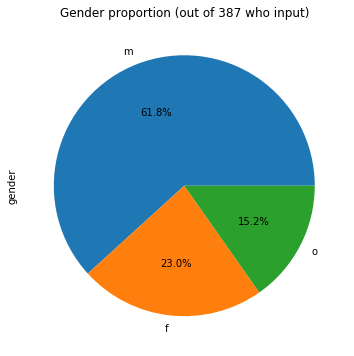

In [704]:
fig_dims = (6,6)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set(title='Gender proportion (out of 387 who input)');
user_metadata.gender.value_counts().plot.pie(autopct="%.1f%%");
plt.savefig("Images/genderproportion.png")

## Top 10 Most Active Users by Play Count


In [695]:
top_10_users = play_count.groupby('user_id')['play_count'].sum().sort_values(ascending=False).head(10)
top_10_users = top_10_users.to_frame()
top_10_users.reset_index(inplace=True)
top_10_users


,user_id,play_count
0,533,115
1,718,113
2,967,94
3,1154,89
4,1069,87
5,341,82
6,839,49
7,195,46
8,1139,42
9,988,42


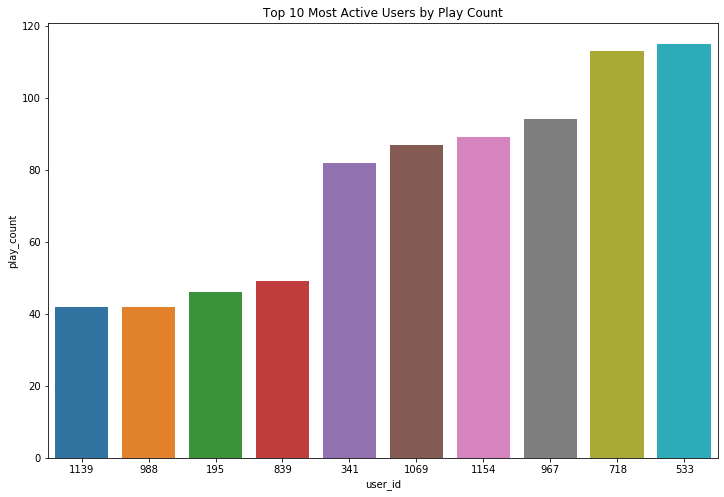

In [742]:
fig_dims = (12,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='user_id', y='play_count', data=top_10_users, order=top_10_users.sort_values('play_count').user_id)
ax.set(title='Top 10 Most Active Users by Play Count');
plt.savefig("images/top10users.png");

# Future Analysis Recommendations

• Regarding median time to click: Some events were triggered and ended at the same time... having such good recommendations on the front page is convenient for users. But does tidal want this? Less time to click or spending more time on the app?

• look at activity by user per month or week 

• Investigate why some searches turn 0 results

• Look at total activity per user over time

• Find ways to cater to gender equality in users

• Investigate activity by users in less represented countries, add more music from those countries?

• Further investigation into user churning/retention

• Refining data input to avoid errors